## Title: Telco Churn Classification Project
In this project, the aim is to find the likielihood of a customer leaving an organisation, the key indictators of churn, as well as the retention strategies that can be implemented to avert this problem, thus  building classification models to perform churn analysis on customer data, a critical task for companies to enhance their revenue by retaining customers.

### 1.0 Business Understanding

#### 1.1 Introduction
Customer churn is a significant problem in the telcom industry as it results in reduced profit margin and negatively impacting long-term sustainability, Churn, which refers to customers discontinuing their service and moving to a competitor, can be driven by various factors such as charges, customer service quality, network coverage, and the competitiveness of offerings. The implications of high churn rates are:

i. Revenue Loss

ii. Decreasd Return On Investment (ROI) on marketing

iii. Reputational Damage due to Customer dissatisfaction

iv. Reduced Market Share and Growth

v. Lower Employee Morale

vi. Financial Uncertainity

Due to this, Machine Learning and Advanced Analytics has provided us with the technologies to transform raw data into actions and insights. I will employ Classification models to get actionable insights.

Classification in Machine Learning is a supervised lerning where the computer program learns from provided data to make new observations by classifying. Variuos classification algorithms such as logistics regression, decison trees, random forests, and gradient boosting will be explored to identify the most effective model for the dataset. The objective is to determine the class or category into which new data points will fall.

In this project, an elaborate analysis will be conducted to train at least some models for predicting customer churn in the telcom company. This analysis will adhere to the CRISP-DM framework, ensuring a structured and systematic approach to model development and evaluation.

### 1.2 Project Objective
The objective of this project is to develop a classification model for churn analysis which is to predict whether customers are likely to leave or continue their relationship with the comapny. By identifying customers at risk of churning, the company can take proactive measures to retain them, thus increasing revenue and profit margins

### 1.3 Data Description
The project will utilize historical data that contains details on customer behaviours and transactional details. Datasets will be retrieved from various sources including a database, GitHub respository and Onedrive.

### 1.4 Success Metrics
i. Good: Accurately predicting churn at least 75% measured with the harmonic f1-score metric.
    
ii. Accurately predicting churn at least 80%.

### 1.5 Hypothesis
#### Hypothesis 1
Null Hypothesis (Ho): There is no significant difference in churn rates between customers with higher and lower monthly charge

Alternative Hypothesis (Ha): There is a significant difference in churn rates between customers with higher and lower monthly charge.

### 1.6 Business Questions
i. What is the average tenure of customers who churned compared to those who stayed?

ii. Do customers with partners or dependents have a lower churn rate?

iii. Is there a correlationship between the contract term (Contract) and customer churn?

iv. What are the common payment methods (Payment Method) among customers who churned?

v. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

vi. What percentage of customers who churned had streaming services (StreammingTV, StreamingMovies)?

vii. How does the total amount charged to customers (TotalCharges) correlate with churn behaviour?

### 2.0 Data Understanding
#### 2.1 Inspecting the datset in depth
i. Data Quality Assessment (info, duplicates, null values, describe etc)

ii. Univariate Analysis: Explore, analyze, and visualize key variables independently of each other

iii. Bivariate Analysis: Explore, analyze, and visualize the relationship variables pairs of different dimensions

iv. Explore, analyze, and visualize the relationship among variables.

v. Answer Analytical Questions

vi. Test Hypothesis

v. Provide insights

## Installation and Importing necessary libraries


In [1]:
#For balancing the data
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install lightgbm


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd 
import numpy as np



#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stat
import scipy.stats as stats
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)


#Imputing missing values library
from sklearn.impute import SimpleImputer

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE


# Feature Processing (Scikit-learn processing, etc. )
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Modelling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

# Other packages
import os
import warnings
warnings.filterwarnings('ignore')

#Exporting Key Components
import pickle


#Supress all warnings
import warnings
warnings.filterwarnings('ignore')

#dislplay options to view columns
pd.set_option("display.max_columns", None)

## Loading and understanding the datasets

In [6]:
#Test Dataset
test = pd.read_excel(r"C:\Users\debor\Downloads\Azubi Africa\Phase 2\Telco-churn-last-2000.xlsx")

test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [8]:
#check for null values
test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [9]:
#loading first train set 
train_1 = pd.read_csv(r"C:\Users\debor\Downloads\Azubi Africa\Phase 2\Telco-churn-first-3000.csv")

train_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,NaN,DSL,False,False,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,False,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [10]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
train_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [12]:
train_1.duplicated().sum()

np.int64(0)

In [13]:
train_1.shape

(3000, 21)

In [14]:
#loading the second dataset
train_2 = pd.read_csv(r"C:\Users\debor\Downloads\Azubi Africa\Phase 2\LP2_Telco-churn-second-2000.csv")

train_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [16]:
train_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
train_2.duplicated().sum()

np.int64(0)

In [18]:
train_2.shape

(2043, 21)

## Concatenanting the train datasets to form one dataset

In [19]:
#concatenating train 1 & train 2

train = pd.concat([train_1,train_2],ignore_index= True)

In [20]:
#understanding the new dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [21]:
train.shape

(5043, 21)

In [22]:
#converting the datatype for total charges

train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors= 'coerce')

test['TotalCharges'] = pd.to_numeric(test['TotalCharges'], errors= 'coerce')

In [23]:
print(train['TotalCharges'].dtype)

float64


In [24]:
print(test['TotalCharges'].dtype)

float64


## Observations



Dropping the ones with less missing values


Check for outliers to make sure to standardize if necessary


In [25]:


#checking for unique values

def unique_values(dataframe):

    unique_summary = []

    for column in dataframe.columns:
        values = dataframe[column].unique()
        counts_values = len(values)

        unique_summary.append({
            'Column': column,
            'unique_values' : values,
            'Count_of_unique_values' : counts_values})

    usummary = pd.DataFrame(unique_summary)

    return usummary



In [26]:
unique_values(train)

,Column,unique_values,Count_of_unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[True, False, No, Yes]",4
4,Dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[False, True, Yes, No]",4
7,MultipleLines,"[nan, False, True, No, No phone service, Yes]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[False, True, nan, No, Yes, No internet service]",6


In [27]:
#dropping customer ID column without removing the index
train.drop(columns = 'customerID', inplace = True)

test.drop(columns = 'customerID', inplace = True)

In [28]:
train.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False


In [29]:
#Creaitng a list oof all category columns

labels = train.select_dtypes(include = 'object').columns.tolist()

labels

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [30]:
#Converting to strings 
train[labels] = train[labels].astype(str)

In [31]:
#Adding a function to loop the change we want to make 

either = {
    "No" : ["False", "0", "No phone service", "No internet service"],
    "Yes" : ["True", "1"]
}

def correct_columns(train, labels, either):

    for column_name in labels:
        for key, values in either.items():
            train[column_name] = train[column_name].replace(values , key )
    return train

train = correct_columns(train, labels , either)

In [32]:
unique_values(train)

,Column,unique_values,Count_of_unique_values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[No, Yes]",2
6,MultipleLines,"[nan, No, Yes]",3
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes, nan]",3
9,OnlineBackup,"[Yes, No, nan]",3


In [33]:
# Replace the 'nan' entry values with the mode

for col in train.columns:
    # Check if 'nan' is in the column
    
    if train[col].dtype == object and 'nan' in train[col].values:
        # Calculate mode ignoring 'nan' entries
        mode_val = train[col][train[col] != 'nan'].mode()[0]
        # Replace 'nan' strings with the mode
        train[col] = train[col].replace('nan', mode_val)
    
# Call the unique function to check that the 'nan' values have been replaced
unique_values(train)

,Column,unique_values,Count_of_unique_values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[No, Yes]",2
6,MultipleLines,"[No, Yes]",2
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes]",2
9,OnlineBackup,"[Yes, No]",2


In [34]:
#creating a list for the numerical columns 

number = train[['tenure', 'TotalCharges', 'MonthlyCharges']]

number

,tenure,TotalCharges,MonthlyCharges
0,1,29.850000,29.850000
1,34,1889.500000,56.950001
2,2,108.150002,53.849998
3,45,1840.750000,42.299999
4,2,151.649994,70.699997
...,...,...,...
5038,24,1990.500000,84.800000
5039,72,7362.900000,103.200000
5040,11,346.450000,29.600000
5041,4,306.600000,74.400000


## UNIVARIATE ANALYSIS

In [35]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5043.000000,5035.000000
mean,0.162403,32.576641,65.090214,2302.062861
std,0.368857,24.529807,30.068133,2269.483576
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,35.775000,417.675003
50%,0.000000,29.000000,70.550003,1401.150024
75%,0.000000,56.000000,90.050003,3862.000000
max,1.000000,72.000000,118.650002,8670.100000


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [37]:
# Changing senior Citizen to string
train['SeniorCitizen'] = train['SeniorCitizen'].astype(str)
test['SeniorCitizen'] = test['SeniorCitizen'].astype(str)

In [38]:
print(number.columns)

Index(['tenure', 'TotalCharges', 'MonthlyCharges'], dtype='object')


In [39]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [40]:
# Imputing missing values for TOTALCHARGES  with 0 if tenure is 0 (NUMERIC COLUMNS)
train['TotalCharges'] = train.apply(lambda row: row['MonthlyCharges']
        if pd.isnull(row['TotalCharges']) and row['tenure'] == 0
        else row['TotalCharges'], axis=1)
 


Processing column: tenure
Column :tenure
Skewness :0.23
Kurtosis :-1.39
Mean :32.58
Median :29.0
------------------------------

Processing column: TotalCharges
Column :TotalCharges
Skewness :0.94
Kurtosis :-0.28
Mean :2302.06
Median :1401.15
------------------------------

Processing column: MonthlyCharges
Column :MonthlyCharges
Skewness :-0.24
Kurtosis :-1.25
Mean :65.09
Median :70.55
------------------------------


Text(0.5, 1.0, 'Boxplot of MonthlyCharges')

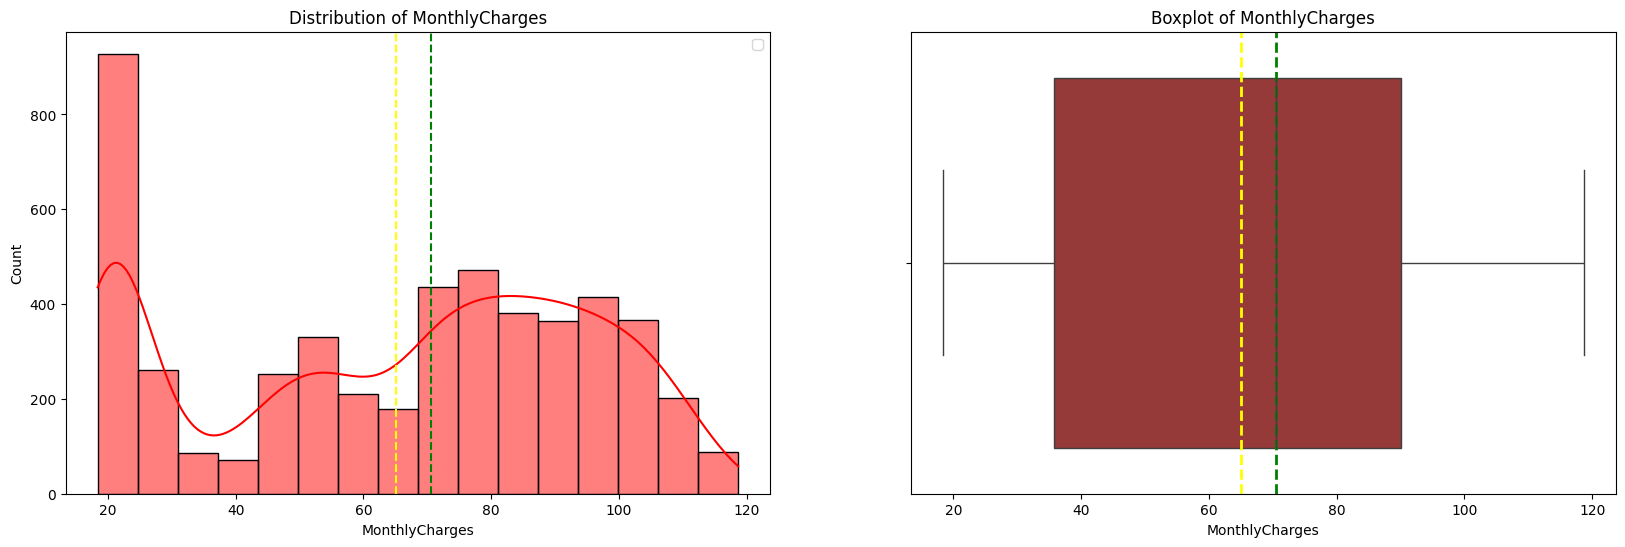

In [41]:

# List of columns to process
columns_to_process = ['tenure', 'TotalCharges', 'MonthlyCharges']
 
for col in columns_to_process:
    if col in number.columns:  # Ensure the column exists in the DataFrame
        print(f"\nProcessing column: {col}")
 
        # Calculating statistical measures
        skewness = round(number[col].skew(), 2)
        kurt = round(number[col].kurtosis(), 2)
        mean = round(number[col].mean(), 2)
        median = round(number[col].median(), 2)
 
        # Printing the calculated values
        print(f"Column :{col}")
        print(f"Skewness :{skewness}")
        print(f"Kurtosis :{kurt}")
        print(f"Mean :{mean}")
        print(f"Median :{median}")
        print("-" * 30)
    else:
        print(f"Column '{col}' not found in the DataFrame.")

#Setting the plot size 

plt.figure(figsize = (20, 6))

#adding the hisplot
plt.subplot(1,2,1)

sns.histplot(number[col], kde= True, color= "red", edgecolor = "black")
plt.axvline(mean , color = "yellow" , linestyle = "dashed")
plt.axvline(median, color = "green" , linestyle = "dashed")
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.legend()

#adding the boxplot 
plt.subplot(1,2,2)
sns.boxplot(x = number[col], color= "brown")
plt.axvline(mean , color = "yellow" , linestyle = "dashed", linewidth=2)
plt.axvline(median, color = "green" , linestyle = "dashed", linewidth=2)
plt.title(f"Boxplot of {col}")
#plt.xlabel(col)
#plt.ylabel("Count")
#plt.legend()

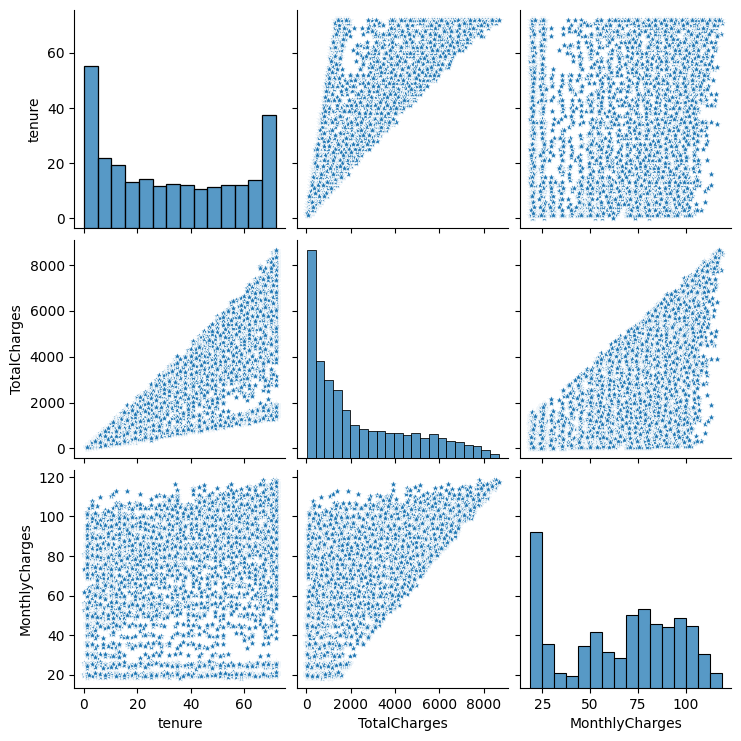

In [42]:
# Create a pairplot graphic visualization

sns.pairplot(number, markers = '*', palette = 'viridis');

In [43]:
#Visualization of categorical columns


def visual_categorical(train, labels):
    
    fig, axes = plt.subplots(2, len(labels), figsize = (15, 20))
    
    for i, labels in enumerate(labels):
        
        count_ax = sns.countplot(x = train[labels], ax = axes[0, i], color = 'blue')
        
        axes[0, i].set_title(f"Countplot of {labels}")
        
        # add labels
        total = len(train)
        for container in count_ax.containers:
            label = [f"{h.get_height()} ({h.get_height() / total * 100:.2f}%" if h.get_height() > 0 else '' for h in container]
            count_ax.bar_label(container, label)
        
        # add strip plot
        sns.stripplot(train[labels], ax = axes[1, i], color = 'green')
        axes[1, i].set_title(f"Stripplot of {labels}")
        
        # Add a bar plot for proportions (if desired)
        #sns.barplot(x=full_train_data[column].value_counts().index,
                    #y=full_train_data[column].value_counts().values,
                    #ax=axes[1, i], color='red')
        # add labels
        freq = train[labels].mode()
        axes[1, i].text(0.05, freq, f"Mode: {freq}", color = 'black', va = 'center')

        
plt.tight_layout()
plt.show();

<Figure size 640x480 with 0 Axes>

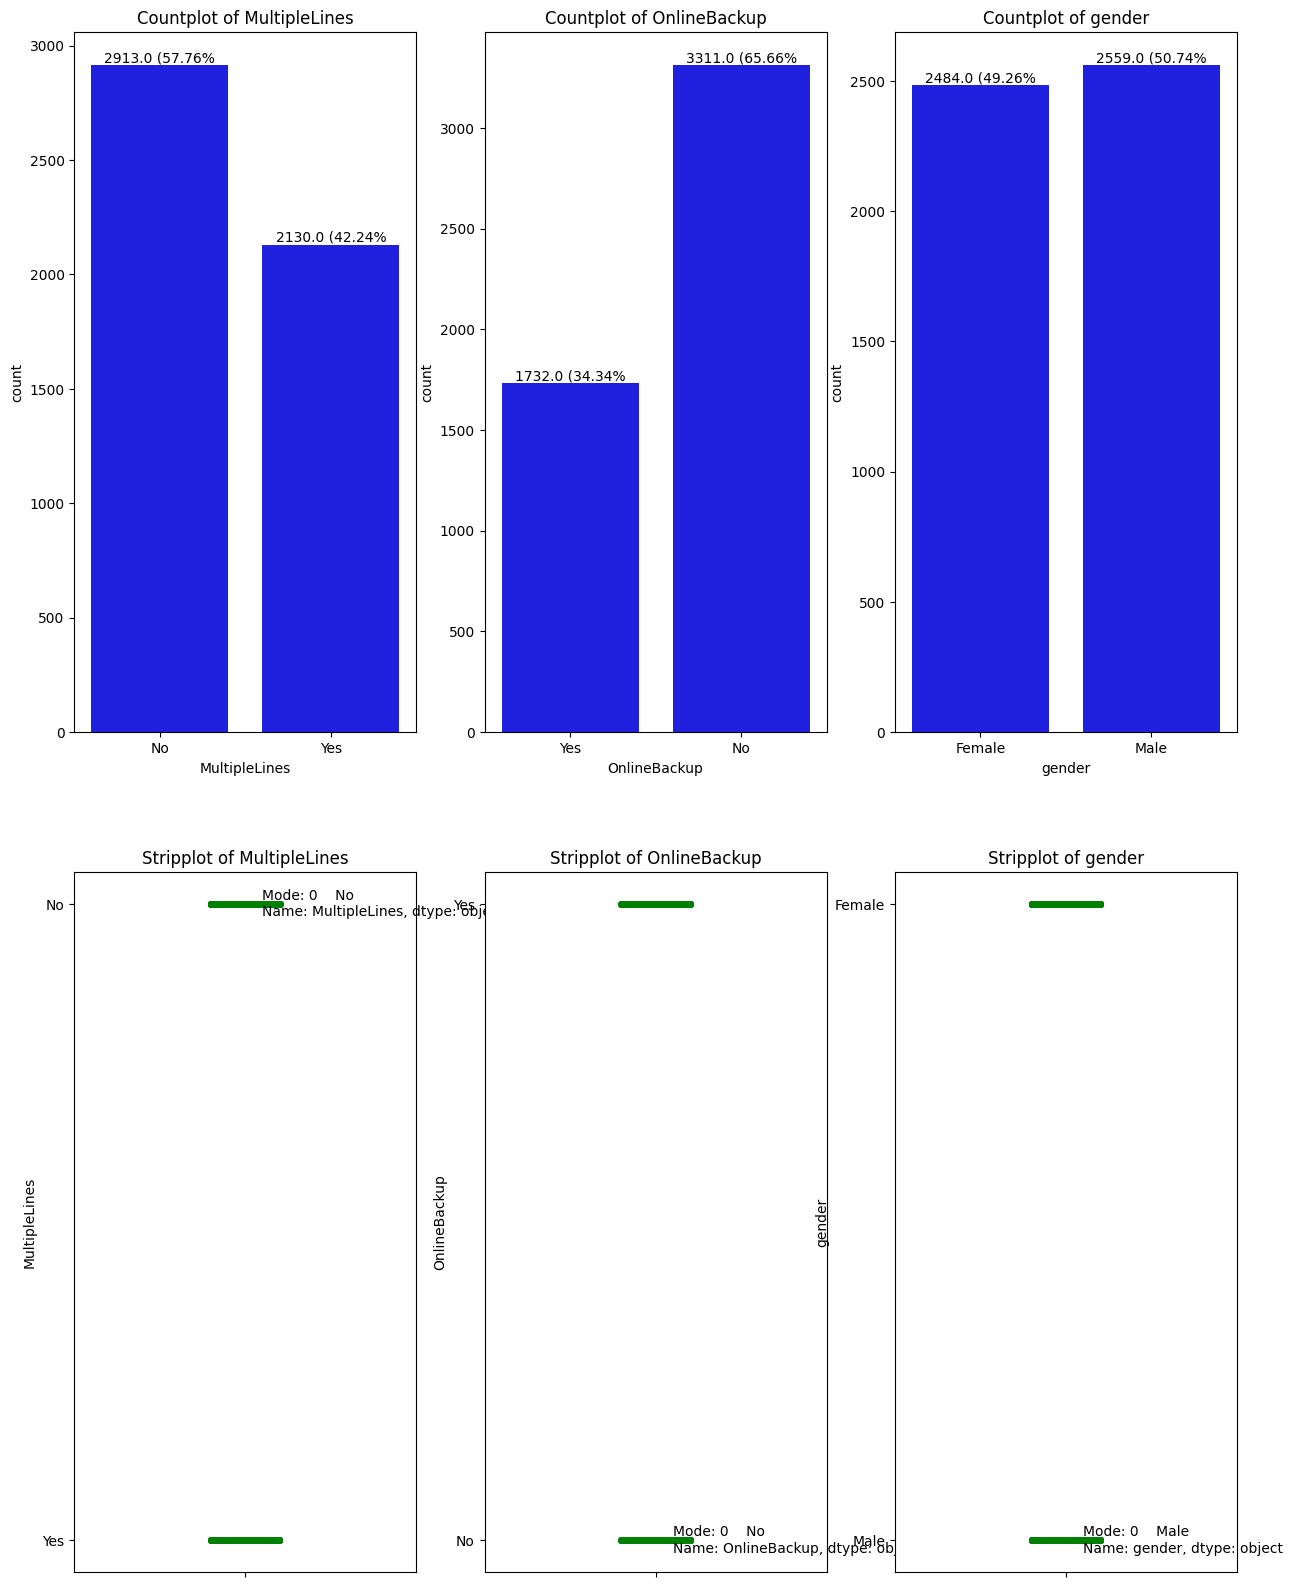

In [44]:
# Call the function and show the graph

visual_categorical(train, ['MultipleLines', 'OnlineBackup', 'gender'])

## Bivariate Analysis

In [45]:
# Create a list of all categorical columns

all_categorical_columns = (
    train.drop(columns = ['Churn'], axis = 1)
    .select_dtypes(include = ['object'])
    .columns
    .tolist()
)
all_categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [46]:
len(all_categorical_columns)

16

In [47]:
def cat_vs_target(data, all_categorical_columns, target):
    
    n_rows = len(all_categorical_columns)//3
    
    fig, axes = plt.subplots(n_rows, 4, figsize = (20, 6 * n_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(all_categorical_columns):
        
        ax = axes[i]
        
        sns.countplot(data = train, x = column, hue = target, ax = ax)
        
        ax.set_xlabel(column)
        ax.set_ylabel("Frequency")
        ax.set_title(f"{column} vs {target}")
        
        # add labels
        total = len(train)
        for container in ax.containers:
            label = [f"{h.get_height()} ({h.get_height() / total * 100:.2f}%" if h.get_height() > 0 else '' for h in container]
            ax.bar_label(container, label)
        
        ax.legend(title = "Churn status", loc = 'upper left')

plt.tight_layout()
plt.show();

<Figure size 640x480 with 0 Axes>

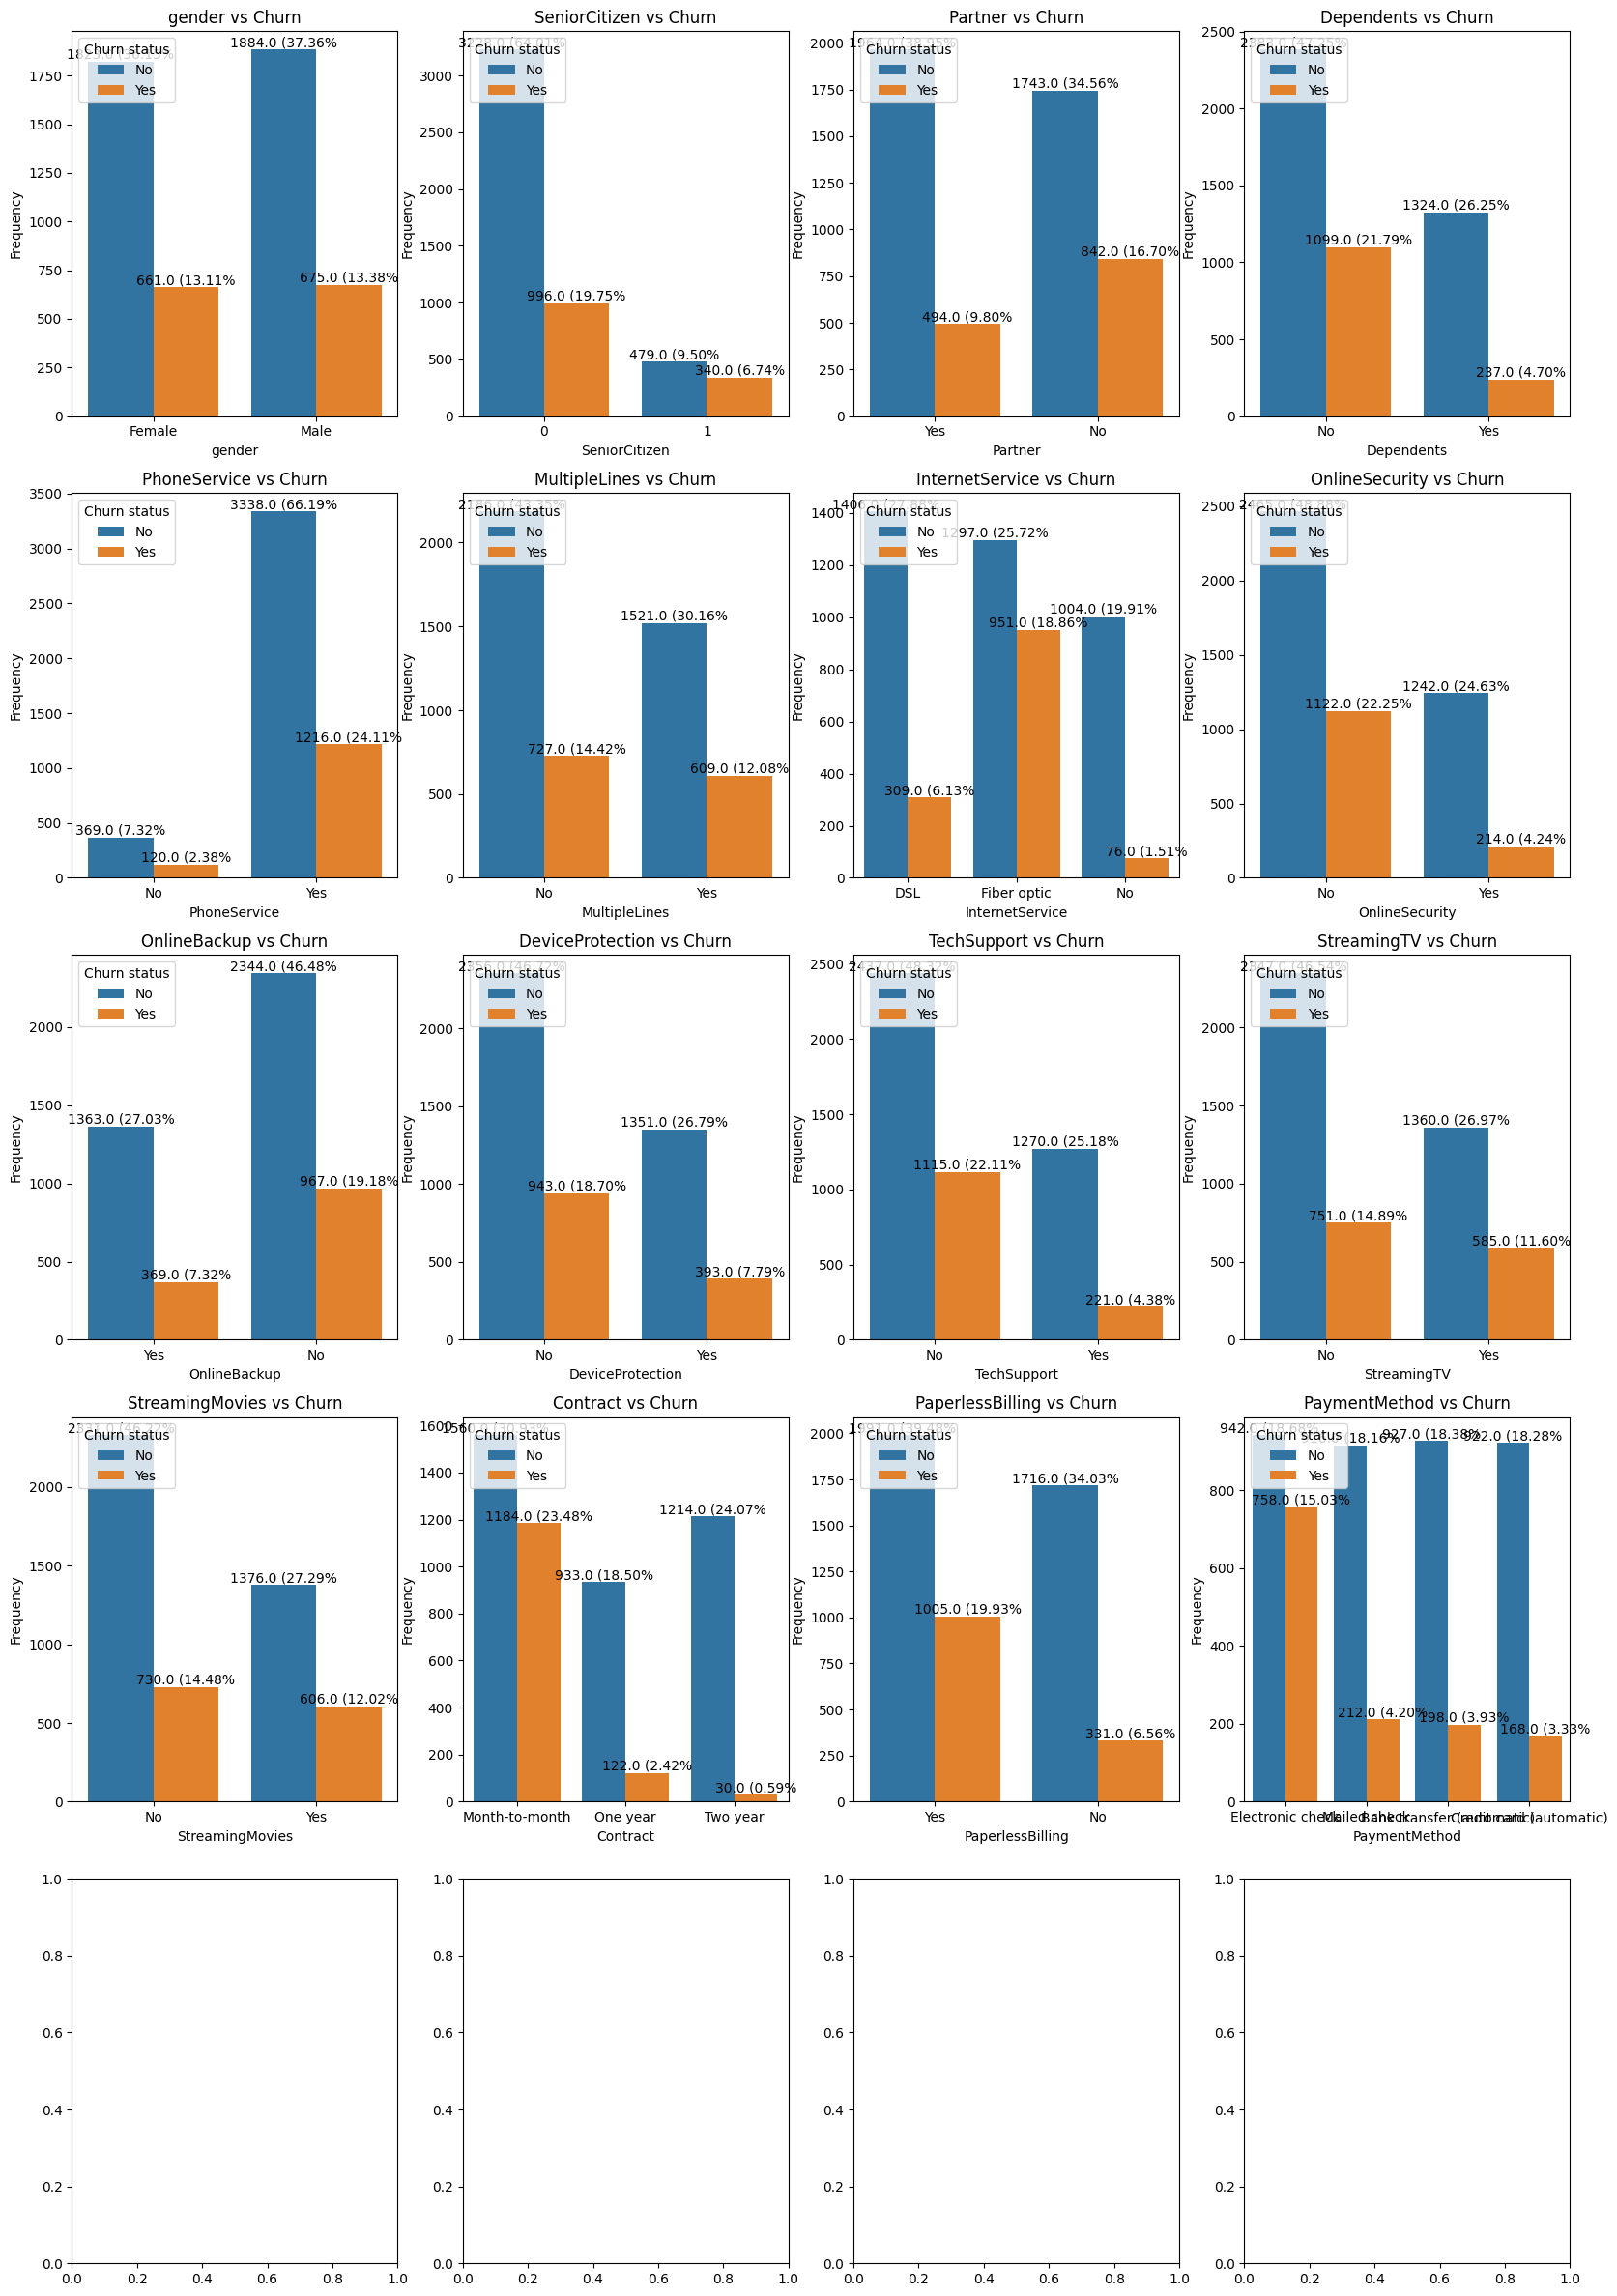

In [48]:
# Calling the function on the data set

cat_vs_target(train, all_categorical_columns, 'Churn')

## MULTIVARIATE ANALYSIS

In [49]:
# Checking for correlation among the numerical columns

correlation = number.corr()
correlation

,tenure,TotalCharges,MonthlyCharges
tenure,1.000000,0.826264,0.240645
TotalCharges,0.826264,1.000000,0.647007
MonthlyCharges,0.240645,0.647007,1.000000


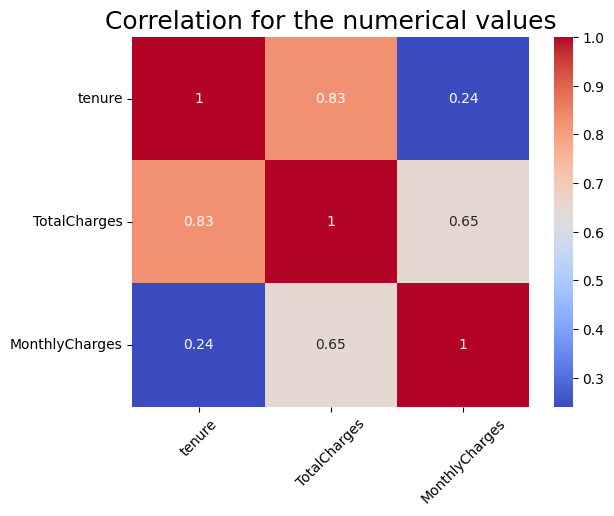

In [50]:
# Ploting the correlation of numerical columns using heatmap

sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title("Correlation for the numerical values", fontsize = 18)
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show();

## Hypothesis 1
Null Hypothesis (Ho): There is no significant difference in churn rates between customers with higher and lower monthly charge

Alternative Hypothesis (Ha): There is a significant difference in churn rates between customers with higher and lower monthly charge.

In [51]:
# Create a new column 'mc_category' to group the monthly charges

train['mc_category'] = np.where(
    train['MonthlyCharges'] > train['MonthlyCharges'].mean(), 'high', 'low'
)

# Check the data set
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mc_category
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,low
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,low
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,low
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,low
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,high


In [52]:
#Creating the series for the high monthly charges only

high_monthly_charge = train['mc_category'] == 'high'

#checking the series
high_monthly_charge.head()

0    False
1    False
2    False
3    False
4     True
Name: mc_category, dtype: bool

In [53]:
#Creating the series for the high monthly charges only

low_monthly_charge = train['mc_category'] == 'low'

#checking the series
low_monthly_charge.head()

0     True
1     True
2     True
3     True
4    False
Name: mc_category, dtype: bool

In [54]:
# Hypotensis testing method 1

# Using the chi2_contingency method create the contigency table of churn vs monthly charges

contingency_table = pd.crosstab(train['Churn'], train['MonthlyCharges'])

# Check the contigency table
contingency_table

MonthlyCharges,18.400000,18.550000,18.700000,18.700001,18.799999,18.800000,18.850000,18.850000,18.900000,18.950000,18.950001,19.000000,19.049999,19.050000,19.100000,19.100000,19.150000,19.150000,19.200000,19.200001,19.250000,19.299999,19.300000,19.350000,19.350000,19.400000,19.400000,19.450000,19.450001,19.500000,19.549999,19.550000,19.600000,19.600000,19.650000,19.650000,19.700000,19.700001,19.750000,19.799999,19.800000,19.850000,19.850000,19.900000,19.900000,19.950000,19.950001,20.000000,20.049999,20.050000,20.100000,20.100000,20.150000,20.150000,20.200000,20.200001,20.250000,20.299999,20.300000,20.350000,20.350000,20.400000,20.400000,20.450000,20.450001,20.500000,20.549999,20.550000,20.600000,20.600000,20.650000,20.650000,20.700000,20.700001,20.750000,20.799999,20.800000,20.850000,20.850000,20.900000,20.900000,20.950000,20.950001,21.000000,21.049999,21.050000,21.100000,21.150000,21.200000,21.200001,21.250000,21.300000,21.450000,22.950001,23.299999,23.450000,23.500000,23.549999,23.550000,23.600000,23.650000,23.750000,23.799999,23.850000,23.900000,23.950000,23.950001,24.000000,24.049999,24.100000,24.100000,24.150000,24.150000,24.200000,24.250000,24.299999,24.300000,24.350000,24.350000,24.400000,24.400000,24.450000,24.450001,24.500000,24.549999,24.600000,24.650000,24.650000,24.700000,24.700001,24.750000,24.799999,24.800000,24.850000,24.850000,24.900000,24.900000,24.950000,24.950001,25.000000,25.049999,25.050000,25.100000,25.100000,25.150000,25.150000,25.200000,25.200001,25.250000,25.299999,25.300000,25.350000,25.350000,25.400000,25.400000,25.450000,25.450001,25.500000,25.549999,25.600000,25.600000,25.650000,25.650000,25.700000,25.700001,25.750000,25.799999,25.800000,25.850000,25.900000,25.900000,26.000000,26.049999,26.100000,26.200001,26.250000,26.299999,26.300000,26.350000,26.350000,26.400000,26.450000,26.450001,26.500000,26.799999,26.900000,28.450001,28.500000,29.049999,29.050000,29.100000,29.150000,29.200001,29.300000,29.350000,29.450000,29.450001,29.500000,29.600000,29.600000,29.650000,29.650000,29.700000,29.750000,29.799999,29.800000,29.850000,29.900000,29.950001,30.100000,30.100000,30.150000,30.200001,30.250000,30.350000,30.350000,30.400000,30.450000,30.500000,30.750000,30.850000,30.900000,31.000000,31.049999,31.050000,31.100000,31.200001,31.350000,31.650000,33.150002,33.450000,33.500000,33.549999,33.599998,33.600000,33.650002,33.700000,33.750000,33.900002,34.000000,34.200000,34.200001,34.250000,34.300000,34.400002,34.500000,34.549999,34.599998,34.650000,34.650002,34.700000,34.700001,34.799999,34.850000,34.950000,35.000000,35.050000,35.099998,35.100000,35.150000,35.200000,35.250000,35.300000,35.400000,35.400002,35.450000,35.450001,35.500000,35.549999,35.599998,35.650002,35.700001,35.750000,35.799999,35.900000,35.900002,36.000000,36.050000,36.100000,36.250000,36.450000,36.500000,36.650002,37.700000,38.500000,38.549999,38.599998,38.800000,38.900002,39.000000,39.050000,39.099998,39.100000,39.200001,39.350000,39.400000,39.450000,39.500000,39.599998,39.650000,39.650002,39.700001,39.900000,39.900002,39.950000,40.049999,40.050000,40.100000,40.150000,40.200000,40.200001,40.250000,40.299999,40.300000,40.349998,40.400000,40.400002,40.450000,40.549999,40.599998,40.600000,40.650000,40.650002,40.700001,40.900000,41.049999,41.100000,41.150000,41.150002,41.349998,41.600000,41.900002,41.950000,42.099998,42.299999,42.349998,42.400000,42.599998,43.050000,43.299999,43.349998,43.450000,43.549999,43.600000,43.650002,43.700001,43.750000,43.799999,43.849998,43.850000,43.900000,43.950000,43.950001,44.000000,44.049999,44.150000,44.200000,44.250000,44.299999,44.300000,44.349998,44.350000,44.400000,44.400002,44.450000,44.450001,44.500000,44.549999,44.550000,44.599998,44.600000,44.650000,44.650002,44.700000,44.700001,44.750000,44.799999,44.800000,44.849998,44.850000,44.900000,44.900002,44.950000,44.950001,45.000000,45.049999,45.050000,45.099998,45.100000,45.150000,45.150002,45.200000,45.200001,45.250000,45.299999,45.300000,45.349998,45.350000,45.40

In [55]:
contingency_table = train.groupby(['Churn','MonthlyCharges']).size().unstack(fill_value=0)

contingency_table


MonthlyCharges,18.400000,18.550000,18.700000,18.700001,18.799999,18.800000,18.850000,18.850000,18.900000,18.950000,18.950001,19.000000,19.049999,19.050000,19.100000,19.100000,19.150000,19.150000,19.200000,19.200001,19.250000,19.299999,19.300000,19.350000,19.350000,19.400000,19.400000,19.450000,19.450001,19.500000,19.549999,19.550000,19.600000,19.600000,19.650000,19.650000,19.700000,19.700001,19.750000,19.799999,19.800000,19.850000,19.850000,19.900000,19.900000,19.950000,19.950001,20.000000,20.049999,20.050000,20.100000,20.100000,20.150000,20.150000,20.200000,20.200001,20.250000,20.299999,20.300000,20.350000,20.350000,20.400000,20.400000,20.450000,20.450001,20.500000,20.549999,20.550000,20.600000,20.600000,20.650000,20.650000,20.700000,20.700001,20.750000,20.799999,20.800000,20.850000,20.850000,20.900000,20.900000,20.950000,20.950001,21.000000,21.049999,21.050000,21.100000,21.150000,21.200000,21.200001,21.250000,21.300000,21.450000,22.950001,23.299999,23.450000,23.500000,23.549999,23.550000,23.600000,23.650000,23.750000,23.799999,23.850000,23.900000,23.950000,23.950001,24.000000,24.049999,24.100000,24.100000,24.150000,24.150000,24.200000,24.250000,24.299999,24.300000,24.350000,24.350000,24.400000,24.400000,24.450000,24.450001,24.500000,24.549999,24.600000,24.650000,24.650000,24.700000,24.700001,24.750000,24.799999,24.800000,24.850000,24.850000,24.900000,24.900000,24.950000,24.950001,25.000000,25.049999,25.050000,25.100000,25.100000,25.150000,25.150000,25.200000,25.200001,25.250000,25.299999,25.300000,25.350000,25.350000,25.400000,25.400000,25.450000,25.450001,25.500000,25.549999,25.600000,25.600000,25.650000,25.650000,25.700000,25.700001,25.750000,25.799999,25.800000,25.850000,25.900000,25.900000,26.000000,26.049999,26.100000,26.200001,26.250000,26.299999,26.300000,26.350000,26.350000,26.400000,26.450000,26.450001,26.500000,26.799999,26.900000,28.450001,28.500000,29.049999,29.050000,29.100000,29.150000,29.200001,29.300000,29.350000,29.450000,29.450001,29.500000,29.600000,29.600000,29.650000,29.650000,29.700000,29.750000,29.799999,29.800000,29.850000,29.900000,29.950001,30.100000,30.100000,30.150000,30.200001,30.250000,30.350000,30.350000,30.400000,30.450000,30.500000,30.750000,30.850000,30.900000,31.000000,31.049999,31.050000,31.100000,31.200001,31.350000,31.650000,33.150002,33.450000,33.500000,33.549999,33.599998,33.600000,33.650002,33.700000,33.750000,33.900002,34.000000,34.200000,34.200001,34.250000,34.300000,34.400002,34.500000,34.549999,34.599998,34.650000,34.650002,34.700000,34.700001,34.799999,34.850000,34.950000,35.000000,35.050000,35.099998,35.100000,35.150000,35.200000,35.250000,35.300000,35.400000,35.400002,35.450000,35.450001,35.500000,35.549999,35.599998,35.650002,35.700001,35.750000,35.799999,35.900000,35.900002,36.000000,36.050000,36.100000,36.250000,36.450000,36.500000,36.650002,37.700000,38.500000,38.549999,38.599998,38.800000,38.900002,39.000000,39.050000,39.099998,39.100000,39.200001,39.350000,39.400000,39.450000,39.500000,39.599998,39.650000,39.650002,39.700001,39.900000,39.900002,39.950000,40.049999,40.050000,40.100000,40.150000,40.200000,40.200001,40.250000,40.299999,40.300000,40.349998,40.400000,40.400002,40.450000,40.549999,40.599998,40.600000,40.650000,40.650002,40.700001,40.900000,41.049999,41.100000,41.150000,41.150002,41.349998,41.600000,41.900002,41.950000,42.099998,42.299999,42.349998,42.400000,42.599998,43.050000,43.299999,43.349998,43.450000,43.549999,43.600000,43.650002,43.700001,43.750000,43.799999,43.849998,43.850000,43.900000,43.950000,43.950001,44.000000,44.049999,44.150000,44.200000,44.250000,44.299999,44.300000,44.349998,44.350000,44.400000,44.400002,44.450000,44.450001,44.500000,44.549999,44.550000,44.599998,44.600000,44.650000,44.650002,44.700000,44.700001,44.750000,44.799999,44.800000,44.849998,44.850000,44.900000,44.900002,44.950000,44.950001,45.000000,45.049999,45.050000,45.099998,45.100000,45.150000,45.150002,45.200000,45.200001,45.250000,45.299999,45.300000,45.349998,45.350000,45.40

In [56]:
# Using the chi2_contingency method create the contingency table of churn vs mc category

contingency_table_mc = pd.crosstab(train['Churn'], train['mc_category'])

# Check the contigency table
contingency_table_mc

mc_category,high,low
Churn,,
No,1830,1877
Yes,981,355


In [57]:
contingency_table_mc = train.groupby(['Churn', 'mc_category']).size().unstack(fill_value=0)

contingency_table_mc


mc_category,high,low
Churn,,
No,1830,1877
Yes,981,355


In [58]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import statsmodels.api as sm

In [60]:

# Use statsmodels to perform chi-square test
table = sm.stats.Table(contingency_table)
result = table.test_nominal_association()

# Extract the chi2, p-value, and degrees of freedom
chi2 = result.statistic
p_value = result.pvalue
dof = result.df

# Print results
print(f"chi2: {chi2:.2f}, p_value: {p_value:.4f}, degrees_of_freedom: {dof}")


chi2: 1111.67, p_value: 1.0000, degrees_of_freedom: 2068


In [61]:
from scipy.stats import chi2_contingency


In [62]:
# Perform the chi-square method on the contigency tables

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"chi2: {chi2:.2f}, p_value: {p_value}, degrees_of_freedom: {dof}")

chi2: 2435.94, p_value: 2.9228176168391307e-08, degrees_of_freedom: 2068


In [63]:
# Perform the chi-square method on the contigency tables

chi2, p_value_mc, dof, expected = chi2_contingency(contingency_table_mc)

print(f"chi2: {chi2:.2f}, p_value: {p_value_mc}, degrees_of_freedom: {dof}")

chi2: 229.50, p_value: 7.648936379911372e-52, degrees_of_freedom: 1


In [64]:
# Decison 1

alpha = 0.05

if p_value > alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


In [65]:
# Decison 2

alpha = 0.05

if p_value_mc > alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


In [66]:
## Create two dataframes of churned and not churned customers

churned = train[train['Churn'] == 'Yes']['MonthlyCharges']

not_churned = train[train['Churn'] == 'No']['MonthlyCharges']

In [67]:
#from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test
#u_stat, p_value = mannwhitneyu(churned, not_churned)

# Print the results
#print('U statistic:', u_stat)
#print('p_value:', p_value)


In [68]:
# Decison making at 0.01 or 0.05

alpha = 0.05

if p_value_mc > alpha:
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


## Business Questions
i. What is the average tenure of customers who churned compared to those who stayed?

ii. Do customers with partners or dependents have a lower churn rate?

iii. Is there a correlationship between the contract term (Contract) and customer churn?

iv. What are the common payment methods (Payment Method) among customers who churned?

v. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

vi. What percentage of customers who churned had streaming services (StreammingTV, StreamingMovies)?

vii. How does the total amount charged to customers (TotalCharges) correlate with churn behaviour?

Average of churned customers: 18
Average of not churned cusyomers: 38


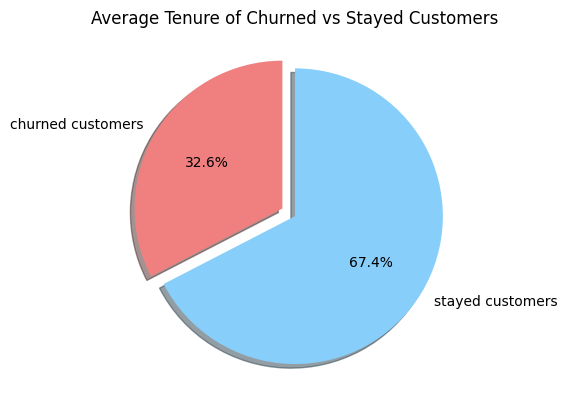

In [69]:
# i. What is the average tenure of customers who churned compared to those who stayed?

criteria_1 = train['Churn'] == 'Yes'

# Create two dataframes using the criteria
left_customers = train[criteria_1]
stayed_customers = train[~criteria_1]

# Average tenure for churned and not churned customers
avg_tenured_churned = left_customers['tenure'].mean()
avg_tenured_not_churned = stayed_customers['tenure'].mean()

# Results
print(f"Average of churned customers: {avg_tenured_churned:.0f}")
print(f"Average of not churned cusyomers: {avg_tenured_not_churned:.0f}")


# Visualization of churned vs not churned customers

labels = ['churned customers', 'stayed customers']
sizes = [avg_tenured_churned, avg_tenured_not_churned]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.pie(
    sizes, 
    labels = labels, 
    colors = colors, 
    explode = explode, 
    autopct = '%1.1f%%', 
    shadow = True, 
    startangle = 90
)
plt.title("Average Tenure of Churned vs Stayed Customers")
plt.show()

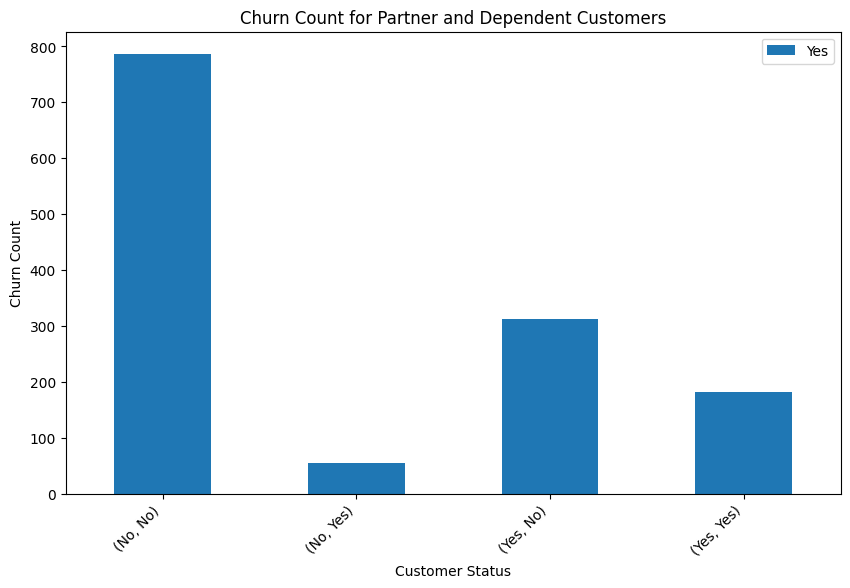

In [70]:
# ii. Do customers with partners and dependents have a lower churn rate?

# Create mask for churn customers
churn_customer = train['Churn'] == 'Yes'

# Dataframe for churn customers
churn_df = train[churn_customer]

# Group by 'partner' and 'dependent' columns and count the occurrences of each 'churn' value
grouped_data = churn_df.groupby(['Partner', 'Dependents'])['Churn'].value_counts().unstack()

# Visualization of churn rates for partnered and dependent customers

# Create the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))

# Customize the chart (optional)
plt.title('Churn Count for Partner and Dependent Customers')
plt.xlabel('Customer Status')
plt.ylabel('Churn Count')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()

Contract        Churn
Month-to-month  No       1560
                Yes      1184
One year        No        933
                Yes       122
Two year        No       1214
                Yes        30
Name: count, dtype: int64


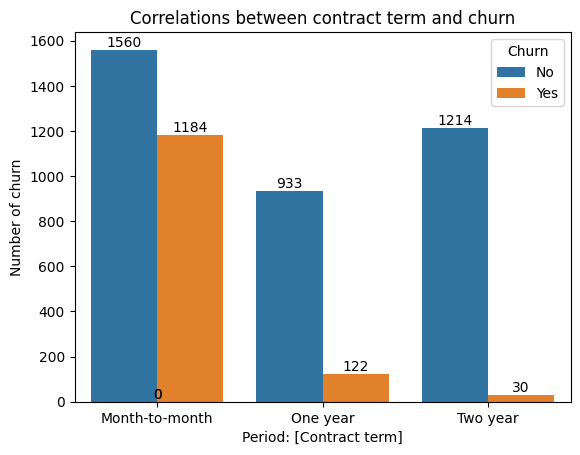

In [71]:
# iii. Is there a correlationship between the contract term (Contract) and customer churn?
corr_contract_churn = train.groupby(['Contract'])['Churn'].value_counts()
print(corr_contract_churn)

# Visualize the correlation between contract term and churn rate

ax = sns.countplot(
    data = train,
    x = 'Contract',
    hue = 'Churn'
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom')
    
plt.title('Correlations between contract term and churn')
plt.ylabel('Number of churn')
plt.xlabel('Period: [Contract term]')
plt.show()

PaymentMethod              Churn
Credit card (automatic)    Yes      168
Bank transfer (automatic)  Yes      198
Mailed check               Yes      212
Electronic check           Yes      758
Name: count, dtype: int64


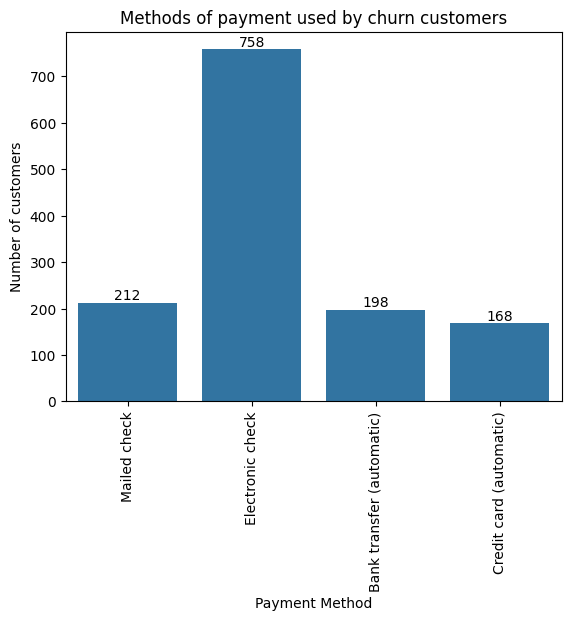

In [72]:
# iv. What are the common payment methods (Payment Method) among customers who churned?

# Create a dataframe for churned only customers
churn_df = train[train['Churn'] == 'Yes']

# Group the data by payment method and count the number of churned
pay_churn_df = churn_df.groupby('PaymentMethod')['Churn'].value_counts().sort_values()
print(pay_churn_df)

# Visualizing the payment method and churn

ax = sns.countplot(
    data = churn_df,
    x = 'PaymentMethod',
)

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 
                 p.get_height()), 
                ha='center', 
                va='bottom')
    
plt.title("Methods of payment used by churn customers")
plt.xlabel('Payment Method')
plt.xticks(rotation = 90)
plt.ylabel("Number of customers")
plt.show()

In [73]:
# vi. What percentage of customers who churned had streaming services (StreammingTV, StreamingMovies)?

# Create masks for streaming services
mask_tv = train['StreamingTV'] == 'Yes'
mask_movies = train['StreamingMovies'] == 'Yes'

# Create a dataframe from the two masks
stream_data = train[mask_tv & mask_movies]

# Create a dataframe of churn customers and tech-related services
churn_customer = stream_data[stream_data['Churn'] == 'Yes']

# Group by both stream tv and stream movies
stream_churn_df = stream_data.groupby(['StreamingTV', 'StreamingMovies', 'Churn']).size().reset_index(name = 'Counts')
stream_churn_df

,StreamingTV,StreamingMovies,Churn,Counts
0,Yes,Yes,No,974
1,Yes,Yes,Yes,416


## DATA PREPARATION

In [74]:
# Drop the created column of 'mc_category'

train.drop(columns = ['mc_category'], axis = 1, inplace = True)
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [75]:
train_data = train.copy()
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [76]:
# Check for class imbalance in our target column, which is the churn column

train['Churn'].value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

In [77]:
from sklearn.utils import resample


In [78]:
# Create dataframes for majority and minority values from the target column

churn_major = train_data[train_data['Churn'] == 'No']
churn_minor = train_data[train_data['Churn'] == 'Yes']

# Use the resampling function to oversample the minority data frame to be equal to majority
minor_resampled = resample(
    churn_minor, 
    replace = True,
    n_samples = len(churn_major),
    random_state = 42
)



In [79]:
# Join the resampled dataframe with the majority dataframe to form one dataframe
train_model = pd.concat([churn_major, minor_resampled], ignore_index = True)

# Check for the target variable whether it has balanced
train_model['Churn'].value_counts()

Churn
No     3707
Yes    3707
Name: count, dtype: int64

In [80]:
import xgboost as xgb
import lightgbm as lgb

In [81]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [82]:
from sklearn.model_selection import train_test_split


In [83]:
from sklearn.preprocessing import (
    RobustScaler, 
    StandardScaler, 
    LabelEncoder, 
    OneHotEncoder,
    QuantileTransformer
)
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    classification_report, 
    confusion_matrix,
    roc_auc_score
)
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import (
    BernoulliNB, 
    CategoricalNB, 
    ClassifierMixin, 
    ComplementNB, 
    GaussianNB, 
    MultinomialNB)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    BaggingClassifier, 
    ExtraTreesClassifier, 
    GradientBoostingClassifier, 
    HistGradientBoostingClassifier, 
    StackingClassifier, 
    VotingClassifier
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV,
    StratifiedKFold
)

In [84]:
from sklearn.pipeline import make_pipeline, Pipeline
import math

In [85]:
# Feature variables
X = train_model.drop('Churn', axis=1)

# Target vriable
y = train_model['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Label encode the values of the target column

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to handle categorical and numerical features differently
preprocessing = ColumnTransformer(
    transformers=[
        ('numerical', make_pipeline(
            RobustScaler(), QuantileTransformer(output_distribution = 'normal')),
         numerical_cols
        ),
        ('categorical', make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse_output=False)), categorical_cols)
    ]
)



In [86]:
preprocessing

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler()),
                                                 ('quantiletransformer',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [87]:
# Define Classification Models

models = {
    "logistic_regression": LogisticRegression(),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(),
    "gradient_boosting": GradientBoostingClassifier(),
    "ada_boost": AdaBoostClassifier(),
    "extra_trees": ExtraTreesClassifier(),
    "K_nearest_neighbor": KNeighborsClassifier(),
    "support_Vector_machine": SVC(),
    "naive_bayes": GaussianNB(),
    "bagging_classifier": BaggingClassifier(),
    "hist_gradient_boosting_classifier": HistGradientBoostingClassifier(),
    "XGB_classifier": XGBClassifier(verbosity = 0),
    "LGBM_classifier": LGBMClassifier(verbosity = -1),
    # "stacking_classifier": StackingClassifier(), 
    #"voting_classifier": VotingClassifier()
}

In [88]:
# Preprocess the data
X_train_processed = preprocessing.fit_transform(X_train)
X_val_processed = preprocessing.transform(X_val)

In [89]:
# Import the confusion matrix again to make use its update
from sklearn.metrics import confusion_matrix

# Create a Dictionary to store evaluation for each model
model_reports = {}

# Loop through models, fit, and evaluate each model
for model_name, model_classifier in models.items():
    
    # Fit the model on the processed training data
    model_classifier.fit(X_train_processed, y_train)
    
    # Predict on the processed test data
    y_pred = model_classifier.predict(X_val_processed)
    
    # Get the evaluation score for each metric
    F1_Score = f1_score(y_val, y_pred)
    Precision_Score = precision_score(y_val, y_pred)
    Recall_Score = recall_score(y_val, y_pred)
    Accuracy_Score = accuracy_score(y_val, y_pred)
    Confusion_Matrix = confusion_matrix(y_val, y_pred)
    Predictions = y_pred
    
    # Store the evaluation score for each model
    model_reports[model_name] = {
        'f1_score': F1_Score,
        'precision_score': Precision_Score,
        'recall_score': Recall_Score,
        'accuracy_score': Accuracy_Score,
        'confusion_matrix': Confusion_Matrix,
        'predictions': Predictions
    }

# Convert the model_reports dictionary into a dataframe
eval_report = pd.DataFrame(model_reports).transpose()

# Sort the dataframe in descending order by the f1_score column
eval_report_df = eval_report.sort_values('f1_score', ascending = False)

# Display the dataframe
eval_report_df

,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,predictions
extra_trees,0.912031,0.875776,0.951417,0.908294,"[[642, 100], [36, 705]]","[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
random_forest,0.906091,0.85509,0.963563,0.900202,"[[621, 121], [27, 714]]","[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
bagging_classifier,0.895006,0.851401,0.94332,0.889413,"[[620, 122], [42, 699]]","[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
decision_tree,0.875858,0.814385,0.947368,0.865813,"[[582, 160], [39, 702]]","[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, ..."
XGB_classifier,0.874764,0.819575,0.937922,0.865813,"[[589, 153], [46, 695]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
LGBM_classifier,0.861094,0.805882,0.924426,0.850978,"[[577, 165], [56, 685]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
hist_gradient_boosting_classifier,0.853015,0.797885,0.916329,0.842212,"[[570, 172], [62, 679]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
gradient_boosting,0.793834,0.757353,0.834008,0.783547,"[[544, 198], [123, 618]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
K_nearest_neighbor,0.793592,0.730159,0.869096,0.774107,"[[504, 238], [97, 644]]","[1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
ada_boost,0.790549,0.750303,0.835358,0.778827,"[[536, 206], [122, 619]]","[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."


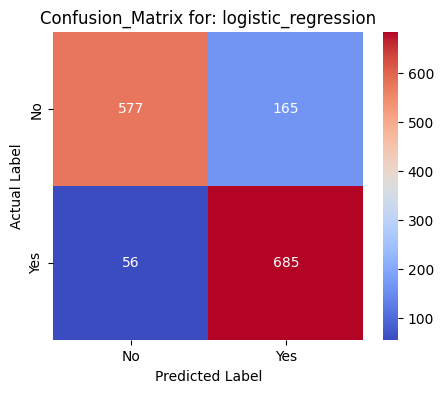

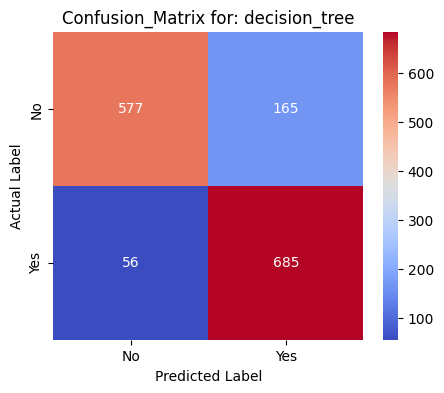

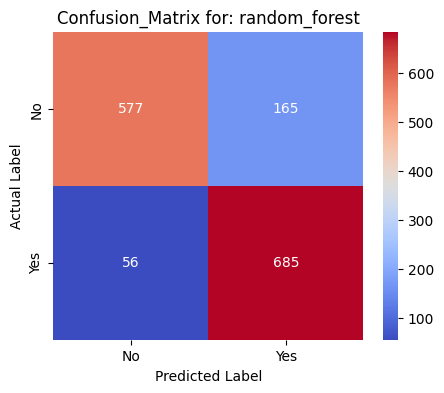

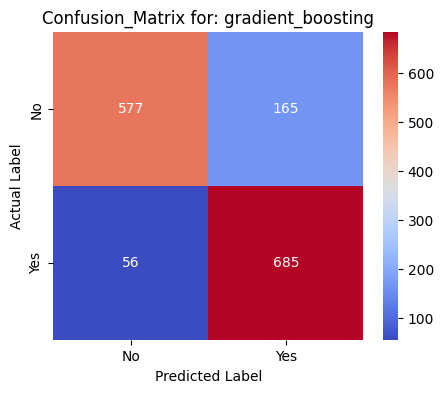

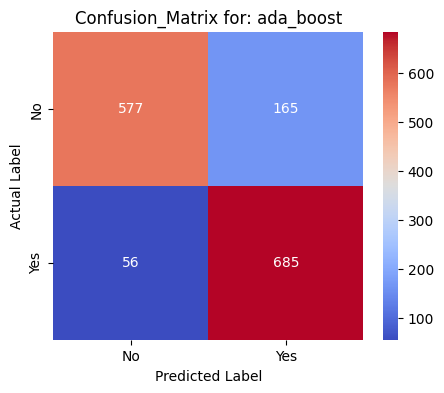

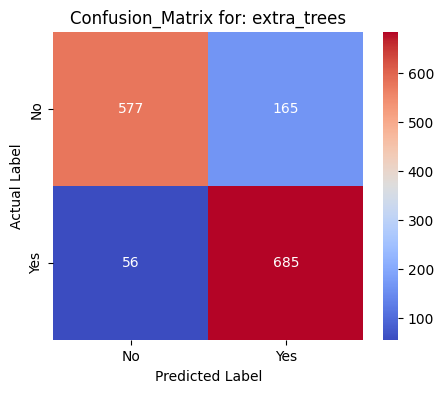

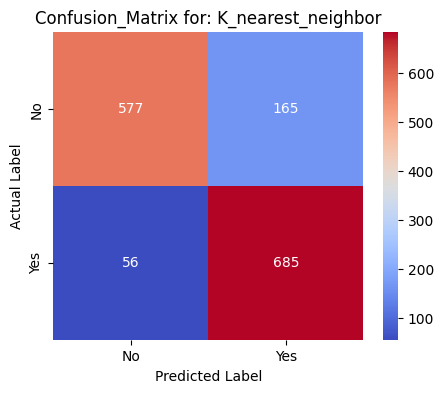

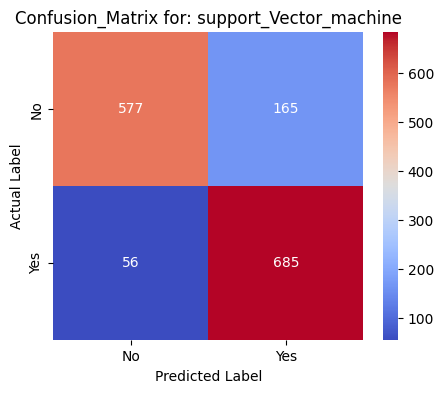

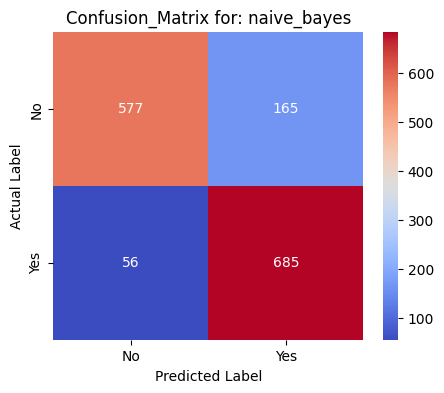

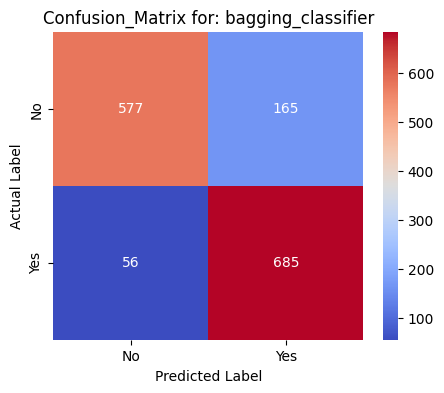

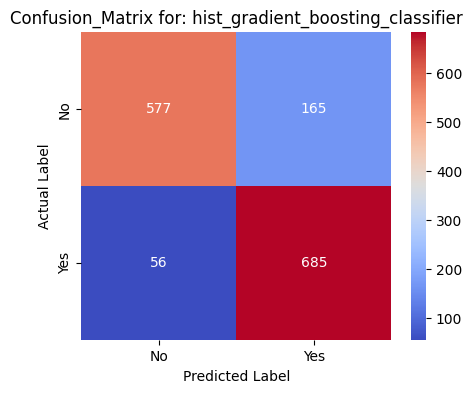

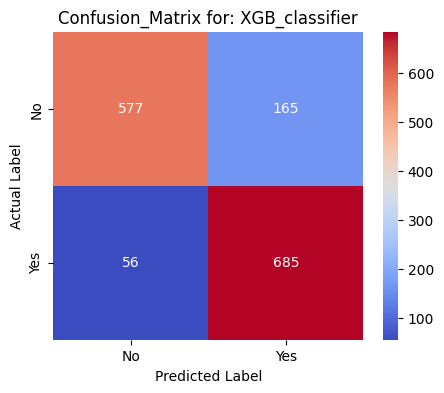

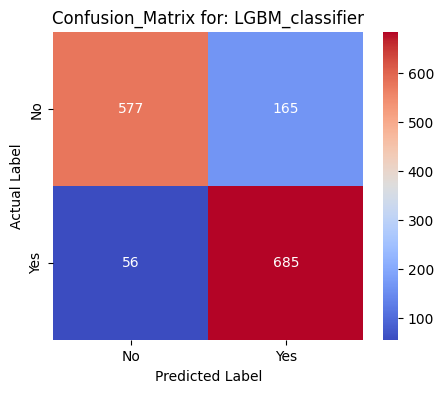

In [90]:
# Create a visualization of confusion matrix

def confusion_matrix_plot(confusion_matrix, model):
    plt.figure(figsize = (5, 4))
    sns.heatmap(
        Confusion_Matrix,
        annot = True,
        cmap = "coolwarm",
        fmt = 'd',
        xticklabels = ["No", "Yes"],
        yticklabels = ["No", "Yes"]
    )
    plt.title(f"Confusion_Matrix for: {model}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    
for model in model_reports.keys():
    confusion_matrix = model_reports[model]["confusion_matrix"]
    confusion_matrix_plot(confusion_matrix, model)

In [91]:
# Display the classification report

for model_name, model_classifier in models.items():
    
    print(f"Classification Report for {model_name}")
    print(classification_report(y_val, y_pred, target_names = ["No", "Yes"]))
    print("=="*30 + "\n")

Classification Report for logistic_regression
              precision    recall  f1-score   support

          No       0.91      0.78      0.84       742
         Yes       0.81      0.92      0.86       741

    accuracy                           0.85      1483
   macro avg       0.86      0.85      0.85      1483
weighted avg       0.86      0.85      0.85      1483


Classification Report for decision_tree
              precision    recall  f1-score   support

          No       0.91      0.78      0.84       742
         Yes       0.81      0.92      0.86       741

    accuracy                           0.85      1483
   macro avg       0.86      0.85      0.85      1483
weighted avg       0.86      0.85      0.85      1483


Classification Report for random_forest
              precision    recall  f1-score   support

          No       0.91      0.78      0.84       742
         Yes       0.81      0.92      0.86       741

    accuracy                           0.85      1483


### Hyperparameter Tuning - RandomizedSearchCV

In [92]:
# Hyperparameter grid for each model

param_grids = {
    "logistic_regression": {
        'C': [0.1, 1, 10, 100],  # Regularization strength
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Optimization algorithms
        'penalty': ['l2'],  # L2 regularization
        'max_iter': [100, 200, 500]
    },
    "decision_tree": {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'max_features': ['auto', 'sqrt', 'log2', None]
    },
    "random_forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    "gradient_boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "ada_boost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    "extra_trees": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "K_nearest_neighbor": {
        'n_neighbors': [3, 5, 11, 19],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "support_Vector_machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    "naive_bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter for GaussianNB
    },
    "bagging_classifier": {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0],
        'bootstrap': [True, False]
    },
    "hist_gradient_boosting_classifier": {
        'learning_rate': [0.01, 0.1, 0.2],
        'max_iter': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_leaf': [20, 50]
    },
    "XGB_classifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 0.1]
    },
    "LGBM_classifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 5, 10],
        'num_leaves': [31, 50, 100],
        'min_data_in_leaf': [20, 50, 100],
        'feature_fraction': [0.7, 0.8, 1.0],
        'bagging_fraction': [0.7, 0.8, 1.0]
    },
}

In [96]:
# Create empty dataframe to store the results
rand_table = pd.DataFrame(columns = ["models", "best_params", "best_scores"])

# Initialize an empty dictionary to hold the RandomizedSearchCV results for each model
rand_searches_tuned = {}

# Initialize a dictionary to hold the best model
best_model_rand = {}

# Create a stratified object
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Iterate over models and apply RandomizedSearchCV for hyperparameter tuning

for model_name, model_classifier in models.items():
    
    # print(f"Tuning hyperparameters for {model_name}...")
    
    # Get the parameter grid for the model
    param_grid = param_grids.get(model_name, {})
    
    # Set up the RandomizedSearchCV with 5-fold cross-validation
    rand_search_tuned = RandomizedSearchCV(
        model_classifier,
        param_distributions=param_grid,
        n_iter=20,
        cv=skf,
        scoring='f1',
        verbose = 0,
        n_jobs =- 1
    )
    
    # Fit RandomizedSearchCV
    rand_search_tuned.fit(X_train_processed, y_train)
    
    # Store the randomized search object in the dictionary
    rand_searches_tuned[model_name] = rand_search_tuned
    
    # Add the results to the dataframe
    best_params = rand_search_tuned.best_params_
    best_score = rand_search_tuned.best_score_
    
    rand_table.loc[len(rand_table)] = [model_name, best_params, best_score]
    
    # Store the best model in best_model_rand dictionary
    best_model_rand[model_name] = rand_search_tuned.best_estimator_
    
    
# Sort the rand table with the best score
rand_table = rand_table.sort_values(by = "best_scores", ascending = False).reset_index(drop = True)

# Display the rand table
rand_table

,models,best_params,best_scores
0,random_forest,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.897495
1,bagging_classifier,"{'n_estimators': 10, 'max_samples': 1.0, 'max_...",0.895803
2,gradient_boosting,"{'subsample': 1.0, 'n_estimators': 200, 'min_s...",0.891835
3,XGB_classifier,"{'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alp...",0.891153
4,LGBM_classifier,"{'num_leaves': 50, 'n_estimators': 200, 'min_d...",0.890573
5,extra_trees,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.883240
6,hist_gradient_boosting_classifier,"{'min_samples_leaf': 20, 'max_iter': 200, 'max...",0.882508
7,decision_tree,"{'splitter': 'best', 'min_samples_split': 2, '...",0.867188
8,K_nearest_neighbor,"{'weights': 'distance', 'n_neighbors': 3, 'met...",0.850665
9,support_Vector_machine,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.835732


In [97]:
# Import the confusion matrix for use so that it can be updated
from sklearn.metrics import confusion_matrix

# Evaluate the best models from RandomizedSearchCV

model_reports_tuned_rand = {}

for model_name, best_classifier in best_model_rand.items():
    
    # Predict on the validation set
    y_pred_tuned_rand = best_classifier.predict(X_val_processed)
    
    # Calculate evaluation metrics
    F1_Score = f1_score(y_val, y_pred_tuned_rand)
    Precision_Score = precision_score(y_val, y_pred_tuned_rand)
    Recall_Score = recall_score(y_val, y_pred_tuned_rand)
    Accuracy_Score = accuracy_score(y_val, y_pred_tuned_rand)
    Confusion_Matrix = confusion_matrix(y_val, y_pred_tuned_rand)
    
    # Store the evaluation score for each model
    model_reports_tuned_rand[model_name] = {
        'f1_score': F1_Score,
        'precision_score': Precision_Score,
        'recall_score': Recall_Score,
        'accuracy_score': Accuracy_Score,
        'confusion_matrix': Confusion_Matrix,
        'predictions': y_pred_tuned_rand
    }

# Convert evaluation reports to DataFrame and sort
eval_report_tuned_rand = pd.DataFrame(model_reports_tuned_rand).transpose()
rand_df = eval_report_tuned_rand.sort_values('f1_score', ascending=False)

rand_df

,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,predictions
random_forest,0.91521,0.879353,0.954116,0.911666,"[[645, 97], [34, 707]]","[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
bagging_classifier,0.908854,0.877987,0.94197,0.905597,"[[645, 97], [43, 698]]","[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
extra_trees,0.897208,0.846707,0.954116,0.890762,"[[614, 128], [34, 707]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
LGBM_classifier,0.893805,0.840666,0.954116,0.886716,"[[608, 134], [34, 707]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
XGB_classifier,0.892562,0.84375,0.947368,0.886042,"[[612, 130], [39, 702]]","[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
gradient_boosting,0.892031,0.851534,0.936572,0.886716,"[[621, 121], [47, 694]]","[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, ..."
hist_gradient_boosting_classifier,0.891139,0.839094,0.950067,0.884019,"[[607, 135], [37, 704]]","[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
decision_tree,0.885839,0.823666,0.958165,0.876601,"[[590, 152], [31, 710]]","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, ..."
K_nearest_neighbor,0.860409,0.77633,0.964912,0.84356,"[[536, 206], [26, 715]]","[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
support_Vector_machine,0.815327,0.762632,0.875843,0.801753,"[[540, 202], [92, 649]]","[0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."


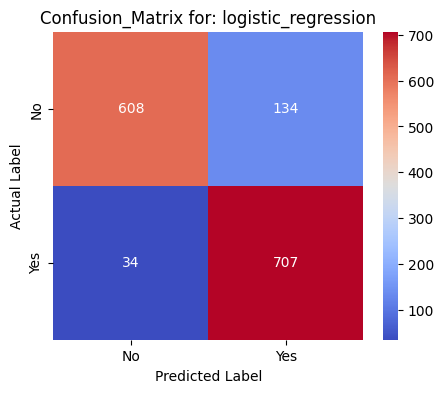

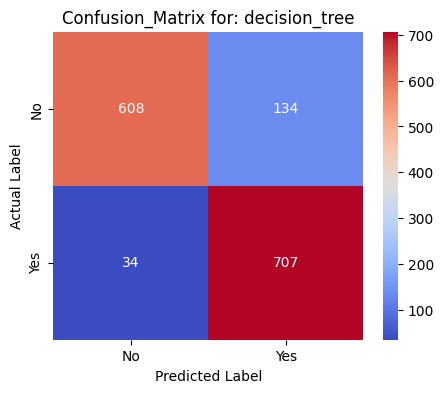

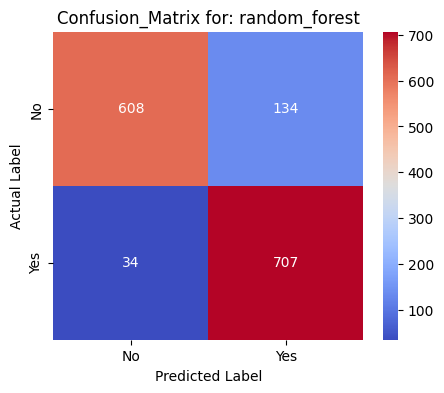

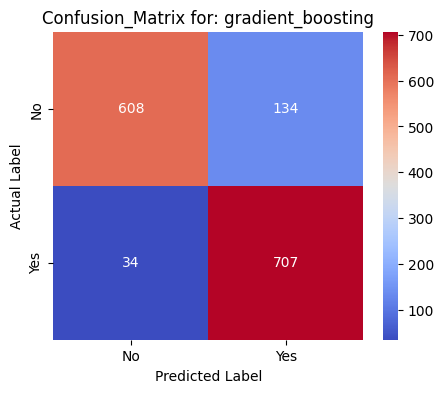

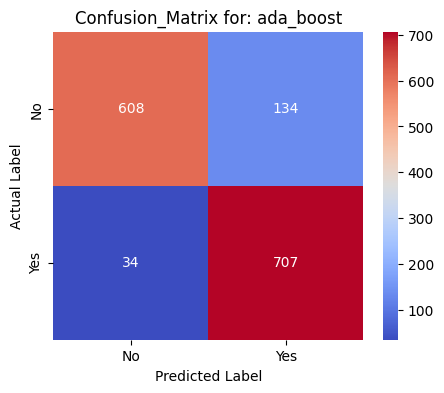

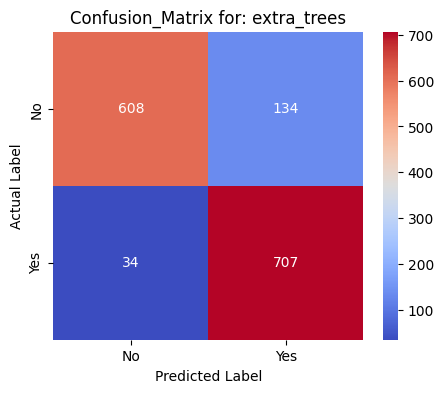

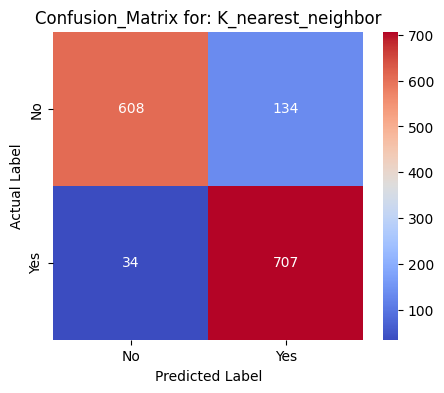

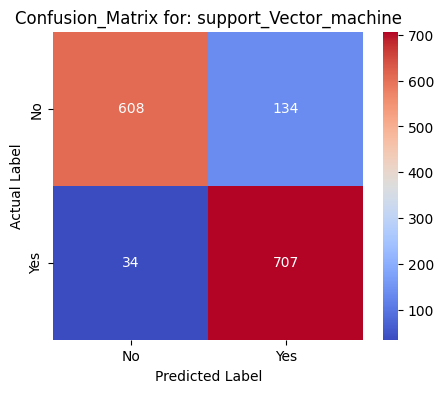

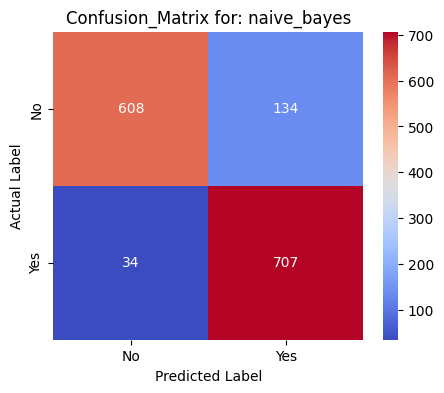

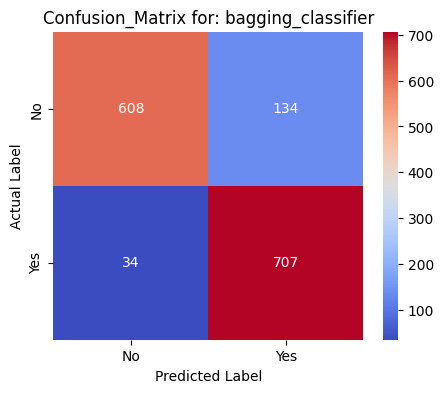

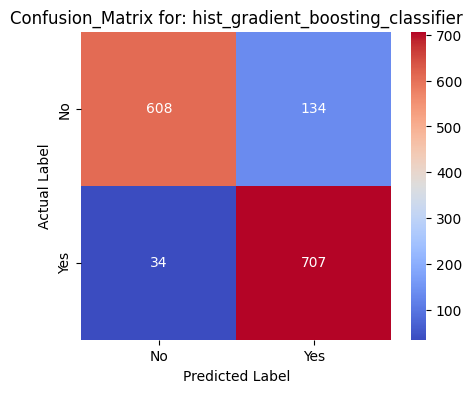

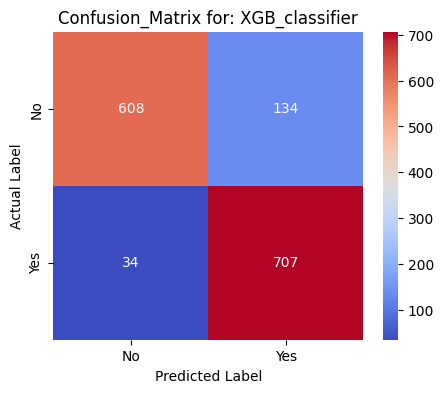

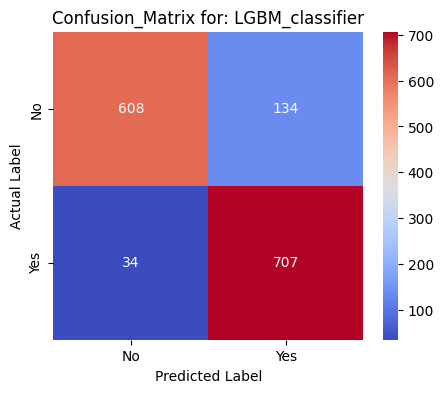

In [98]:
# Create a visualization of RandomizedSearchCV confusion matrix

for model in model_reports_tuned_rand.keys():
    conf_mat = model_reports_tuned_rand[model]["confusion_matrix"]
    confusion_matrix_plot(conf_mat, model)

## Model Evaluation

In [99]:
# Get the copy of the test data frame

test_set = test.copy()

test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   object 
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [100]:
test_set.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [101]:

# Select the numeric columns
nueric_columns = test_set.select_dtypes(exclude = ['object'])

# Find where there are NaN's in the numeric columns
nan_rows = number.isna().any(axis = 1)

# Use the boolean mask to filter the test data set
rows_with_nan = test[nan_rows]

# Display the rows with NaN values
rows_with_nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
753,Male,0,No,No,1,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,29.15,29.15
936,Male,0,No,No,9,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.25,576.95
1082,Male,0,Yes,No,49,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,84.35,4059.35
1340,Male,0,No,Yes,5,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),48.65,235.20


In [102]:
# Fill the missing values in the TotalCharges column with the median value
test_set['TotalCharges'].fillna(test_set['TotalCharges'].median(), inplace = True)
test_set.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [103]:
# Check for missing values in the test data set
test_set.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [104]:
# Check if the columns in the test set march those in the x train set
# If true no output is expected

assert test_set.columns.all() == X_train.columns.all()

In [105]:
# Check the columns in both test set and x_train set

print(f"The columns in test set dataframe are: {test_set.columns}")
print(f"The columns in X_train dataframe are: {X_train.columns}")

The columns in test set dataframe are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
The columns in X_train dataframe are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [106]:
test_set['SeniorCitizen'] = test_set['SeniorCitizen'].astype('category')

In [107]:
print(test_set['SeniorCitizen'].unique())
print(test_set.dtypes)


['0', '1']
Categories (2, object): ['0', '1']
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
dtype: object


In [108]:
# Confirm that the SeniorCitizen column has changed
print(f"The data type of SeniorCitizen column is: {test_set['SeniorCitizen'].dtype}\n")
print(f"The value counts for SeniorCitizen column are: {test_set['SeniorCitizen'].value_counts()}")

The data type of SeniorCitizen column is: category

The value counts for SeniorCitizen column are: SeniorCitizen
0    1677
1     323
Name: count, dtype: int64


In [109]:
 #Preprocess the test data set

test_set_processed = preprocessing.transform(test_set)

In [110]:
# Create an empty dictionary to store the best estimators
best_estimators = {}

# Create an empty dictionary to store the y tests results
y_test = {}

# Iterate over
for model in ["random_forest", "bagging_classifier", "extra_trees"]:
    if model in best_model_rand:
        best_estimators[model] = best_model_rand[model]
    else:
        print(f"{model} does not exist")

In [111]:
for model, model in best_estimators.items():
    y_test[model] = model.predict(test_set_processed)

In [112]:
# Print the predictions for each model
for model_name, predictions in y_test.items():
    print(predictions)

[1 0 0 ... 0 1 0]
[1 0 0 ... 1 0 0]
[1 0 0 ... 1 1 0]


In [113]:
# Import the confusion matrix for use so that it can be updated
from sklearn.metrics import confusion_matrix

# Initialize Results dictionary
result_test = {}

# Loop through rand_searches_tuned items
for model, rand_search_tuned in best_model_rand.items():
    
    # Ensure only bagging and extra trees are processed
    if model not in ["random_forest", "bagging_classifier", "extra_trees"]:
        continue
    
    # Predict on evaluation data
    y_test_pred = rand_search_tuned.predict(test_set_processed)
    
    # Calculate other metrics
    accuracy = accuracy_score(predictions, y_test_pred)
    f1 = f1_score(predictions, y_test_pred)
    precision = precision_score(predictions, y_test_pred)
    recall = recall_score(predictions, y_test_pred)
    conf_matrix = confusion_matrix(predictions, y_test_pred)
    # y_test_prob = rand_search_tuned(predictions, y_test_pred)
    roc_auc = roc_auc_score(predictions, y_test_pred)
    
    # Store the results in eval_results_tuned dictionary
    result_test[model] = {
        'accuracy' : accuracy,
        'f1' : f1,
        'precision' : precision,
        'recall' : recall,
        'conf_matrix' : conf_matrix,
        # 'y_test_prob' : y_test_prob,
        'roc_auc' : roc_auc
    }
    
# Convert results into a dataframe
scores_test = pd.DataFrame(result_test).transpose()

# Sort the dataframe by roc_auc column
scores_test_df = scores_test.sort_values(by = "roc_auc", ascending = False)

# Display the sorted evaluation scores
print("Model Scores:")
scores_test_df

Model Scores:


,accuracy,f1,precision,recall,conf_matrix,roc_auc
extra_trees,1.0,1.0,1.0,1.0,"[[1452, 0], [0, 548]]",1.0
random_forest,0.9115,0.826979,0.890526,0.771898,"[[1400, 52], [125, 423]]",0.868043
bagging_classifier,0.854,0.706827,0.785714,0.642336,"[[1356, 96], [196, 352]]",0.78811


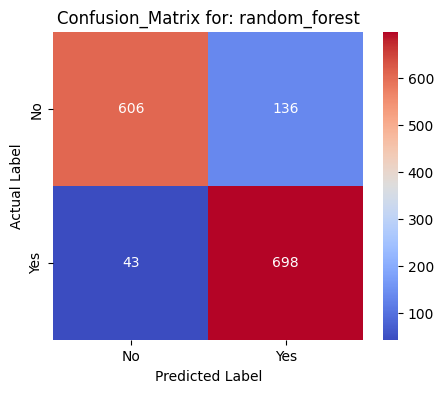

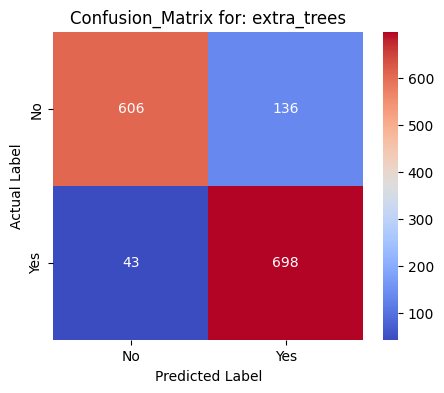

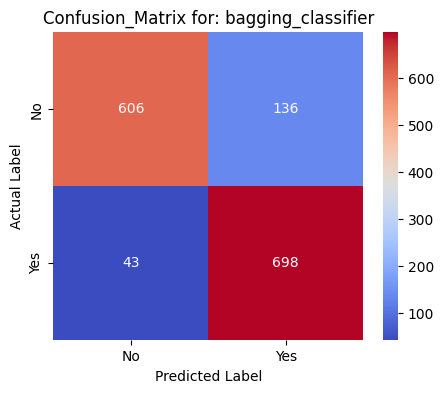

In [ ]:
# Create a visualization of the test confusion matrix

for model in result_test.keys():
    conf_mat = result_test[model]["conf_matrix"]
    confusion_matrix_plot(conf_mat, model)

## Saving the cleaned data

In [114]:
train_data.to_csv('trainset.csv', index = False)

In [115]:
import joblib

In [116]:
# Save the model
joblib.dump(model, 'telco_churn_model.pkl')

['telco_churn_model.pkl']

In [117]:
import pickle

In [ ]:

# models = [
#     LogisticRegression(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     GradientBoostingClassifier(),
#     AdaBoostClassifier(),
#     ExtraTreesClassifier(),
#     KNeighborsClassifier(),
#     SVC(),
#     GaussianNB(),
#     BaggingClassifier(),
#     HistGradientBoostingClassifier()
#     ]
 
 
# for model in models:
#     pipeline = Pipeline(steps = [('preprocessing', preprocessing),T
#                                  ('classifier', model)
#                                  ])
   
# pipeline.fit(X_train, y_train)
   
# with open ('premodel.pkl', 'wb') as file:
#     pickle.dump(pipeline, file)

In [ ]:
# models = [
#     LogisticRegression(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     GradientBoostingClassifier(),
#     AdaBoostClassifier(),
#     ExtraTreesClassifier(),
#     KNeighborsClassifier(),
#     SVC(),
#     GaussianNB(),
#     BaggingClassifier(),
#     HistGradientBoostingClassifier()
# ]

# for model in models:
#     pipeline = Pipeline(steps=[
#         ('preprocessing', preprocessing),
#         ('classifier', model)
#     ])
#     # Fit the pipeline
#     pipeline.fit(X_train, y_train)

#     model_name = type(model).__name__  # Get the class name of the model
#     filename = f"premodel.pkl"

#     # Save the pipeline to a file
#     with open(filename, 'wb') as file:
#         pickle.dump(pipeline, file)
 
#     print(f"Saved {model_name} to {filename}")

In [118]:
# Dictionary to store the model instances
 
models_instances = {}
 
for index,row in rand_table.iterrows():
    model_name = row['models']
    best_params = row['best_params']
 
 
    clean_params = {k.split('__')[1]: v for k, v in best_params.items() if '__' in k}
   
    if model_name == "logistic_regression":
        model = LogisticRegression(**clean_params)
    elif model_name ==  "decision_tree":
        model = DecisionTreeClassifier(**clean_params)
    elif model_name ==  "random_forest":
        model =  RandomForestClassifier(**clean_params)
    elif model_name == "gradient_boosting":
        model =  GradientBoostingClassifier(**clean_params)
    elif model_name == "ada_boost":
        model = AdaBoostClassifier(**clean_params)
    elif model_name == "extra_trees":
        model = ExtraTreesClassifier(**clean_params)
    elif model_name == "K_nearest_neighbor":
        model = KNeighborsClassifier(**clean_params)
    elif model_name == "support_Vector_machine":
        model = SVC(**clean_params)
    elif model_name == "naive_bayes":
        model = GaussianNB(**clean_params)
    elif model_name == "bagging_classifier":
        model = BaggingClassifier(**clean_params)
    elif model_name == "hist_gradient_boosting_classifier":
        model = HistGradientBoostingClassifier(**clean_params)
    elif model_name == "XGB_classifier":
        model = XGBClassifier(**clean_params)
    elif model_name == "LGBM_classifier":
        model = LGBMClassifier(**clean_params)
    else:
        raise ValueError(f"Invalid model name: {model_name}")
 
   
 
    models_instances[model_name] = model
   
    # Save the model
    joblib.dump(model, f'{model_name}.pkl')
 
 
    print("All models Saved Successfully")
 
 
 
 

All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully
All models Saved Successfully


In [119]:
# Saving the models in a pipeline using pickle

# list of models
model = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    BaggingClassifier(),
    HistGradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier()
]

# Create the preprocessing pipeline
preprocessing = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_cols),
        ('categorical', OneHotEncoder(), categorical_cols)
    ]
)
#pipeline for each model
for model in model:
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessing),
        ('classifier', model)
    ])

# Fit the pipeline
pipeline.fit(X_train, y_train)
 
# Save the pipeline to a file
with open('premodel.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
